## Problem 5: Simple Linear Regression

In this question, you will implement simple linear regression from scratch. The dataset you will work with is called the Boston data set. You can find more information about the data set here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html 

You will use the pandas library to load the csv file into a dataframe: 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the csv file and load into a pandas dataframe 
# make sure Boston.csv is in the same file path as this notebook
boston = pd.read_csv('Boston.csv')

In [4]:
# read the above link to learn more about what each of the columns indicate 
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Simple linear regression builds a linear relationship between an input variable $X$ and an output variable $Y$. We can define this linear relationship as follows: 

$$Y = \beta_0 + \beta_1X$$

#### Objective: find the linear relationship between the proportion of non-retail business acres per town (indus) and the full-value property-tax rate per 10,000 dollars (tax)

So our equation will look like:

$$TAX = \beta_0 + \beta_1INDUS$$

Here, the coefficient $\beta_0$ is the intercept, and $\beta_1$ is the scale factor or slope. How do we determine the values of these coefficients? 

There are several different methods to do so, but we will focus on the Ordinary Least Squares (OLS) method. This method minimizes the sum of the squares of the differences between the observed dependent variable and those predicted by the linear function. 

Recall that a residual is the difference between any data point and the line of regression. When we develop a regression model, we want the sum of the residuals squared to be minimized, indicating that the model is a close fit to the data. 

$$RSS = \sum_{i =1}^{n} (y_i - f(x_i))^2$$
$$= \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

This is the objective function we minimize to find $\beta_0$ and $\beta_1$. 

In [5]:
# set X to 'indus' and y to 'tax'
X = boston['indus']
y = boston['tax']

First, visualize the data by plotting X and y using matplotlib. Be sure to include a title and axis labels. 

Text(0.5, 1.0, 'The scatter of the indus and the tax')

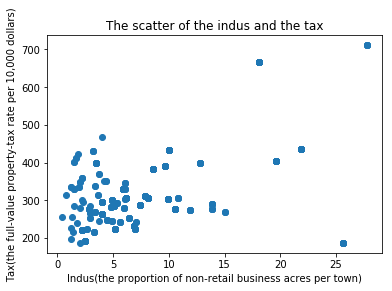

In [10]:
# TODO: display plot 

# TODO: labels and title

plt.scatter(X,y)
plt.xlabel('Indus(the proportion of non-retail business acres per town)')
plt.ylabel('Tax(the full-value property-tax rate per 10,000 dollars)')
plt.title('The scatter of the indus and the tax')

TODO: What do you notice about the relationship between the variables? 

A:Most of the data is relatively concentrated, there are some deviation data.

Next, find the coefficients. The values for $\beta_0$ and $\beta_1$ are given by the following equations, where $n$ is the total number of values. This derivation was done in class. 


$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$


$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

In [44]:
# TODO: implement function 
def get_coeffs(X, y):
    '''
    Params:
        X: the X vector
        y: the y vector
    Returns:
        a tuple (b1, b0)
    '''
    b0 = 0
    b1 = 0
    a = 0
    b = 0
    n = len(X)
    X_ave = np.mean(X)
    y_ave = np.mean(y)
    for i in range(0,n):
        a += (X[i]-X_ave)*(y[i]-y_ave)
    for i in range(0,n):
        b += (X[i]-X_ave)**2
    b1 = a/b
    b0 = y_ave - X_ave*b1
    return b0,b1
    raise NotImplementedError

In [45]:
# run cell to call function and display the regression line
# the values are rounded for display convenience 
b0, b1 = get_coeffs(X, y)
print("Regression line: TAX = " + str(round(b0)) + " + " + str(round(b1)) +"*INDUS")

Regression line: TAX = 211.0 + 18.0*INDUS


Plot the regression line overlayed on the real y-values. 

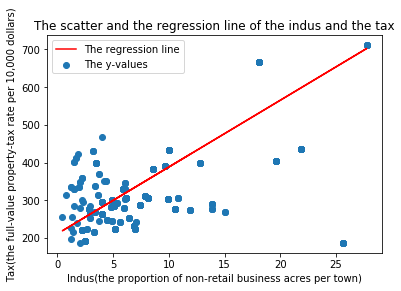

In [46]:
# TODO: plot y-values 


# TODO: plot regression line


# TODO: labels and title

plt.scatter(X,y,label = 'The y-values')
plt.xlabel('Indus(the proportion of non-retail business acres per town)')
plt.ylabel('Tax(the full-value property-tax rate per 10,000 dollars)')
plt.title('The scatter and the regression line of the indus and the tax')
Y = []
for i in X:
    Y_i = b0 +b1*i
    Y.append(Y_i)
plt.plot(X,Y,label = 'The regression line',color = 'r')
plt.legend()

The line appears to fit the data, but first, let us find the RSS to evaluate this model. The RSS is used to measure the amount of variance in the data set that is not explained by the regression model. Recall that
$$RSS = \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

In [38]:
# TODO: implement function
def get_RSS(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        residual sum of squares (RSS) 
    '''
    RSS = 0
    for i in range(0,len(X)):
        RSS += (y[i] - (b0 + b1*X[i]))**2
    return RSS
    raise NotImplementedError

In [39]:
# run this cell to print RSS
print("RSS:", get_RSS(b0, b1, X, y))

RSS: 6892554.224031512


We can also evaluate the model through the Root Mean Squared Error (RMSE) and the Coefficient of Determination ($R^2$ score). 
- The RMSE is similar to the RSS, but provides a value with more interpretable units -- in our case, tax rate per 10,000 dollars.  
- The $R^2$ value represents the proportion of the variance for the dependent variable that is explained by the independent variable. 

Use the following equations to find the RMSE and $R^2$ score:

$$ RMSE = \sqrt(\sum_{i=1}^{n} \frac{1}{n} (\hat{y_i} - y_i)^2 )$$

$$ R^2 = 1 - \frac{SS_r}{SS_t} $$ where

$$SS_t = \sum_{i = 1}^{n} (y_i - \bar{y})^2$$

and

$$SS_r = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$



In [47]:
# TODO: implement function
def get_RMSE(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vectore
        y: y vector
    Returns:
        rmse 
    '''
    RMSE = 0
    for i in range(0,len(y)):
        RMSE +=  ((b0 + b1*X[i]) - y[i])**2 / len(y)
    RMSE = RMSE**(1/2)
    return RMSE
    raise NotImplementedError

In [48]:
# run cell to print RMSE
print("RMSE: ", get_RMSE(b0, b1, X, y))

RMSE:  116.71181887064344


In [49]:
# TODO: implement function
def get_R2(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        r2 score
    '''
    R2 = 0
    sst = 0
    ssr = 0
    y_ave = np.mean(y)
    for i in range(0,len(y)):
        sst += (y[i] - y_ave)**2
        ssr += (y[i] - (b0 + b1*X[i]))**2
    R2 = 1 - ssr/sst
    return R2
    raise NotImplementedError

In [50]:
# run cell to print RMSE
print("R2: ", get_R2(b0, b1, X, y))

R2:  0.5194952370037837


TODO: Analyze what the above $R^2$ score indicates about the model. 

A: This linear regression is not very accurate.The closer the 𝑅2 score is to 1,the better accuracy the model gets.

Now, we will compare the above results with the results from using scikit-learn, a machine learning library in Python. Read the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn how to use this library. Return the $R^2$ score and RMSE. 

In [81]:
# TODO: scikit learn function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def linear_regression_SKL(X, y):
    '''
    Params:
        X: X vector
        y: y vector
    Returns:
        rmse and r2 as a tuple
    '''
    linreg = LinearRegression()
    X = np.array(X).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    linreg.fit(X,y)
    y_pre = linreg.predict(X)
    RMSE = np.sqrt(mean_squared_error(y,y_pre))
    R2 = r2_score(y,y_pre)
    # when using the function, the order of the input values will influence the result.
    return (RMSE,R2)
    raise NotImplementedError

In [82]:
# run this cell to print results from SKL LR
linear_regression_SKL(X, y)

(116.71181887064391, 0.5194952370037791)

TODO: Analyze the results and compare the RMSE and $R^2$ to the previous method.

A:It is the same.The results of using built-in function and the custom function are same.  